<u>**Цель:**</u> Предсказывать стоимость квартир используя вводимые параметры

<u>**План решения задачи:**</u>

1. Анализ данных:
    
    1.1. Анализ целевого признака;        
    1.2. Анализ зависимости отдельных признаков на целевой;        
    1.3. Анализ зависимостей между отдельными признаками;        
    1.4. Построение гипотез на основе анализа.
        
2. Чистка данных:
    
    2.1. Заполнение нулевых значений;        
    2.2. Обработка аномальных данных.
        
3. Подготовка данных для модели
    
5. Обучение модели и оптимизация гиперпараметров
    

# Анализ данных

Импортируем необходимые библиотеки:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, boxcox

from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
df = pd.read_csv('/kaggle/input/cian-flats-2023/cian-2023-01-13.csv')

In [3]:
df.shape

(1481, 16)

In [4]:
df.columns

Index(['RoomCount', 'AllArea', 'LivingArea', 'KitchenArea', 'Floor',
       'FloorsCount', 'ContactType', 'ContactName', 'FondationYear',
       'HousingType', 'CeilingHeight', 'Restroom', 'Balcony/Loggia',
       'RenovationType', 'WindowView', 'Price'],
      dtype='object')

In [5]:
df.head(10)

,RoomCount,AllArea,LivingArea,KitchenArea,Floor,FloorsCount,ContactType,ContactName,FondationYear,HousingType,CeilingHeight,Restroom,Balcony/Loggia,RenovationType,WindowView,Price
0,3,60.00,36.0,9.0,4,9,Агентство недвижимости,НДС недвижимость,1976.0,Вторичка,2.5,1 совмещенный,NaN,Косметический,NaN,6100000
1,3,60.00,40.0,6.0,3,5,Агентство недвижимости,НДС недвижимость,NaN,Вторичка,NaN,1 совмещенный,NaN,Евроремонт,Во двор,3830000
2,1,38.00,22.0,9.0,1,17,ID 62701863,NaN,2007.0,Вторичка,NaN,NaN,NaN,Косметический,На улицу и двор,2800000
3,3,71.00,45.0,14.0,2,6,Агентство недвижимости,ID 20850301,NaN,Вторичка,2.7,1 раздельный,2 лоджии,Косметический,Во двор,5400000
4,3,63.30,39.0,11.0,9,9,Агентство недвижимости,Эпсилон-недвижимость,1993.0,Вторичка,NaN,1 раздельный,1 лоджия,Косметический,На улицу и двор,5900000
5,2,58.50,36.0,11.0,10,18,ID 57684001,NaN,2009.0,Вторичка,2.7,1 раздельный,1 лоджия,Косметический,На улицу и двор,3950000
6,1,42.54,12.2,18.9,6,11,Агентство недвижимости,КУРСКАЯ НЕДВИЖИМОСТЬ,NaN,Новостройка,2.8,1 совмещенный,NaN,NaN,NaN,4964418
7,4,82.08,37.1,18.5,5,11,Агентство недвижимости,КУРСКАЯ НЕДВИЖИМОСТЬ,NaN,Новостройка,NaN,2 раздельных,NaN,NaN,NaN,9578736
8,1,35.00,17.0,10.0,6,9,Агентство недвижимости,НДС недвижимость,2014.0,Вторичка,NaN,1 совмещенный,NaN,NaN,NaN,2800000
9,2,47.00,28.0,7.5,1,5,Агентство недвижимости,НДС недвижимость,1979.0,Вторичка,NaN,1 раздельный,NaN,Евроремонт,Во двор,4000000


## Анализ целевого признака

Выделяем целевой признак - 'Price'

In [6]:
X = df.drop(columns='Price')
Y = df.Price
Y.describe()

count    1.481000e+03
mean     6.981163e+06
std      1.103461e+08
min      8.000000e+05
25%      2.950000e+06
50%      3.600000e+06
75%      4.720000e+06
max      4.250000e+09
Name: Price, dtype: float64

Замечаем в целевом признаке аномально высокие значения, которые будут препятствовать корректному отображению данных на графиках.

Находим единственый выброс, предположительно ошибка ввода, поэтому заменяем значение целевого признака на более вероятное.

In [7]:
df.loc[df['Price'] > 20000000]

,RoomCount,AllArea,LivingArea,KitchenArea,Floor,FloorsCount,ContactType,ContactName,FondationYear,HousingType,CeilingHeight,Restroom,Balcony/Loggia,RenovationType,WindowView,Price
991,2,58.4,34.0,12.0,7,17,Агентство недвижимости,КУРСКАЯ НЕДВИЖИМОСТЬ,2014.0,Вторичка,NaN,1 раздельный,1 балкон,Косметический,На улицу и двор,4250000000


In [8]:
def fix_price_input(X):
    price_anomaly_id = X.loc[X['Price'] > 20000000].index
    X.loc[price_anomaly_id, 'Price'] = 4250000

fix_price_input(df)
Y.describe()

count    1.481000e+03
mean     4.114350e+06
std      1.929074e+06
min      8.000000e+05
25%      2.950000e+06
50%      3.600000e+06
75%      4.700000e+06
max      1.673000e+07
Name: Price, dtype: float64

Исследуем целевую переменную

На графике заметно отсутствие явных аномалий, прослеживается тренд к смещенному нормальному распределению.

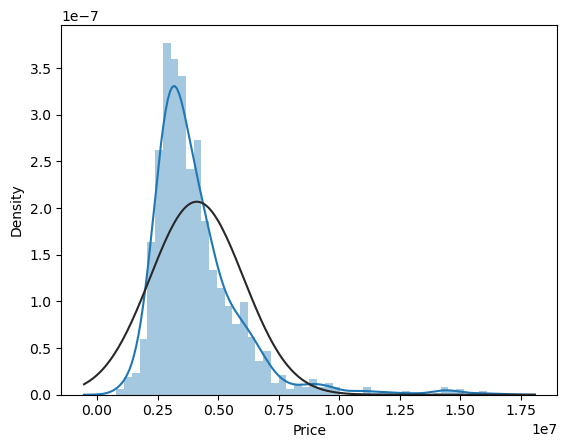

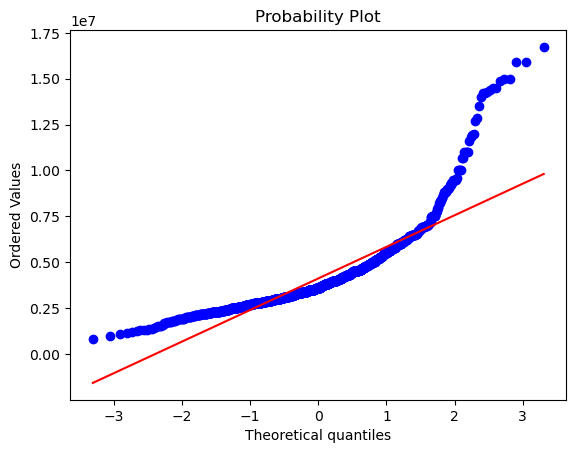

In [9]:
sns.distplot(Y, fit=norm)
fig = plt.figure()
res = stats.probplot(Y, plot=plt)

Чтобы устранить смещение, логарифмируем выборку.

Полученные коэффициенты сдвига(μ) и масштаба(σ) указывают на тенденцию к логнормальному распределению

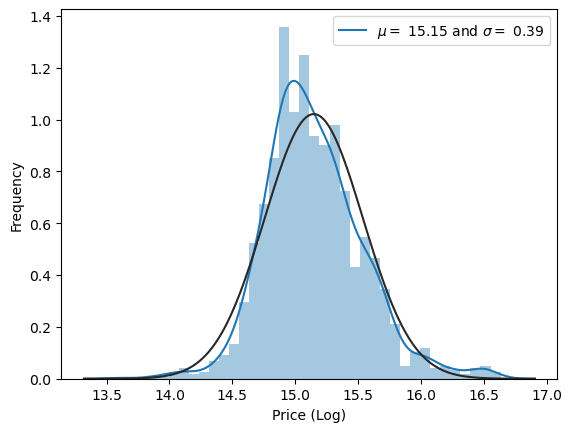

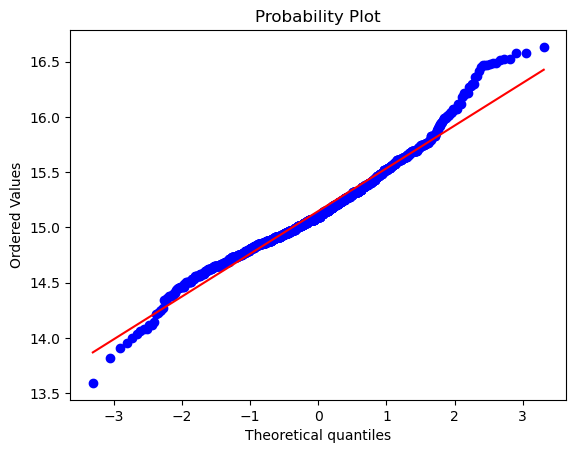

In [10]:
y_log = np.log(Y)
sns.distplot(y_log, fit=norm)
(mu, sigma) = norm.fit(y_log)
plt.legend(['$\mu=$ {:.2f} and $\sigma=$ {:.2f}'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.xlabel('Price (Log)')
fig = plt.figure()
res = stats.probplot(y_log, plot=plt)

Преобразование выборки по методу Бокса-Кокса показывает схожий результат, с меньшим смещением по сравнению с методом логарифмирования

Lambda value used for Transformation: -0.3131205841600321


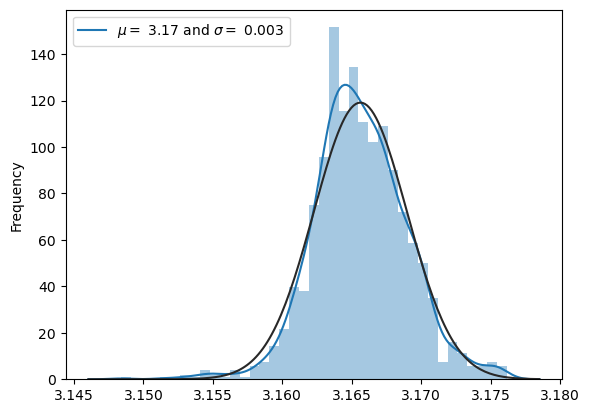

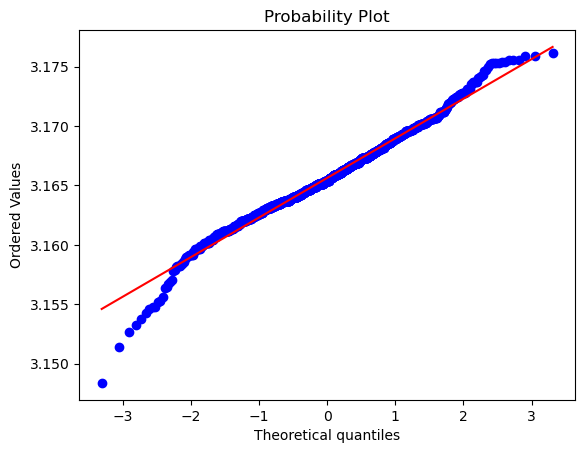

In [11]:
bc_target, bc_lambda = boxcox(Y)
sns.distplot(bc_target, fit=norm)
(mu, sigma) = norm.fit(bc_target)
plt.legend(['$\mu=$ {:.2f} and $\sigma=$ {:.3f}'.format(mu, sigma)],
            loc='best')
print(f"Lambda value used for Transformation: {bc_lambda}")
plt.ylabel('Frequency')
fig = plt.figure()
res = stats.probplot(bc_target, plot=plt)

Математическое ожидание - 4.114.350 и среднеквадратичное отклонение -  1.929.074 указывают на высокую степень разброса значений исходной выборки, но построив графики мы установили, что используя методы преобразований можно достичь приближения данных к нормальному распределению.

## Анализ зависимости отдельных признаков на целевой

Описание нецелевых признаков:

1. 'RoomCount' - Количество комнат в квартире
    
2. 'AllArea' - Общая площадь квартиры

3. 'LivingArea' - Площадь жилых комнат

4. 'KitchenArea' - Площадь кухни

5. 'Floor' - Этаж квартиры

6. 'FloorsCount' - Количество этажей в доме

7. 'ContactType' - Тип контактного лица: агентство недвижимости, собственник и т.д.

8. 'ContactName' - Название агенства недвижимости или имя контактного лица

9. 'FondationYear' - Год основания дома

10. 'HousingType' - Вторичная недвижимость или новостройка

11. 'CeilingHeight' - Высота потолка

12. 'Restroom' -  Количество санузлов

13. 'Balcony/Loggia' - Количество балконов и/или лоджий

14. 'RenovationType' - Наличие и тип ремонта

15. 'WindowView' - Вид из окна (во двор и/или на улицу)

In [12]:
discrete_variables = ['RoomCount', 'FloorsCount',
                      'Restroom', 'Balcony/Loggia', 'WindowView']
continuous_variables = ['AllArea', 'LivingArea', 'KitchenArea', 
                        'CeilingHeight', 'FondationYear']
nominal_variables = ['ContactType', 'ContactName', 
                     'HousingType', 'RenovationType']
ordinal_variables = ['Floor']

count    1481.000000
mean        1.908170
std         0.864273
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max         5.000000
Name: RoomCount, dtype: float64


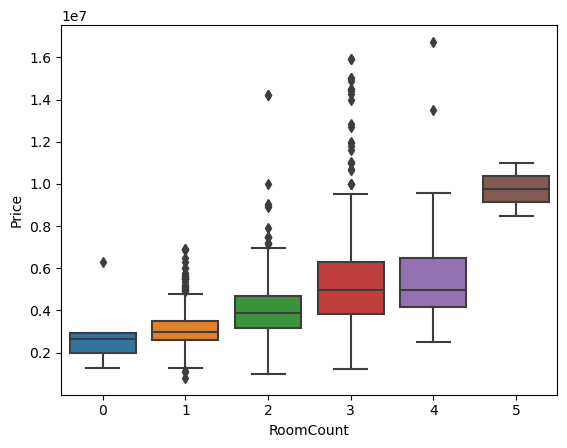

count    1481.000000
mean        9.794058
std         4.750262
min         1.000000
25%         5.000000
50%         9.000000
75%        14.000000
max        19.000000
Name: FloorsCount, dtype: float64


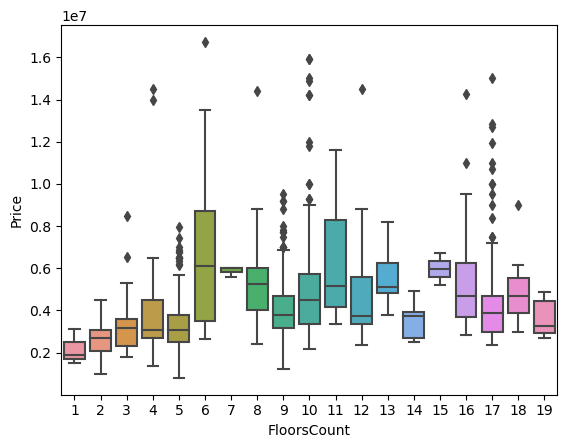

count             1232
unique               5
top       1 раздельный
freq               669
Name: Restroom, dtype: object


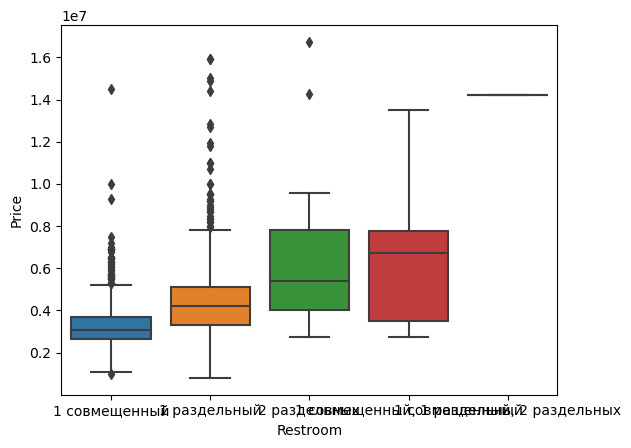

count         1008
unique           6
top       1 балкон
freq           637
Name: Balcony/Loggia, dtype: object


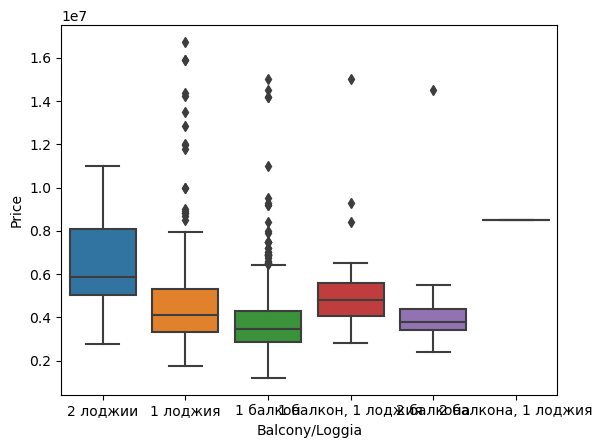

count        1056
unique          3
top       Во двор
freq          411
Name: WindowView, dtype: object


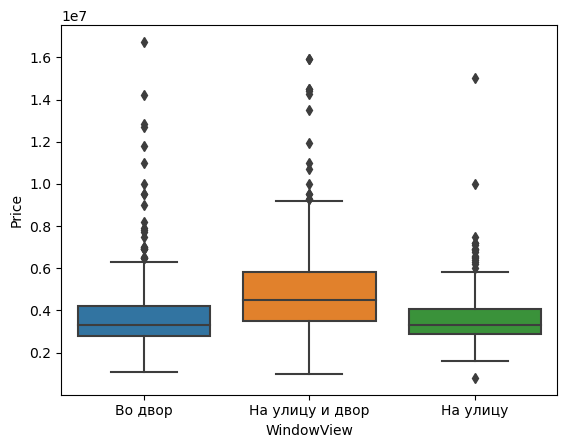

In [13]:
for variable in discrete_variables:
    print(df[variable].describe())
    sns.boxplot(x=variable, y='Price', data=df)
    plt.show()

Для признака 'RoomCount' наблюдается заметный тренд. Явных зависимостей для признака 'FloorCount' на графике не видно, но можно сделать вывод что в выборке маленькое количество записей с 7-ми и 15-ти этажными домами, квартиры в одноэтажных домах, как правило, дешевле других, а квариры в 6-ти этажных домах имеют самый большой разброс в цене. В распределении значений признака 'Restroom' прослеживается склонность к тренду, но на графике видно, что пятая категория содержит слишком мало значений

count    1481.000000
mean       51.255874
std        17.901347
min        13.000000
25%        38.000000
50%        47.000000
75%        61.000000
max       167.500000
Name: AllArea, dtype: float64


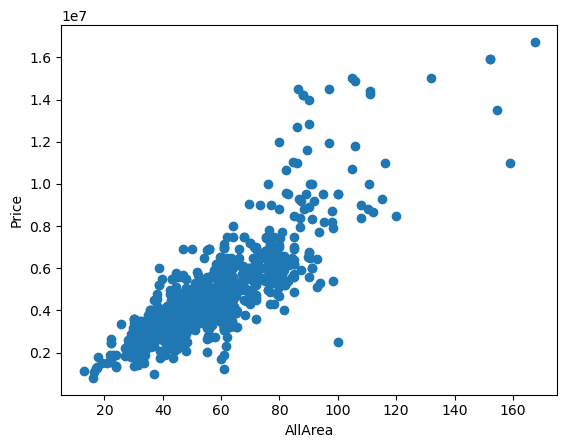

count    1255.000000
mean       29.489880
std        13.226091
min         6.000000
25%        18.000000
50%        28.000000
75%        37.000000
max       127.000000
Name: LivingArea, dtype: float64


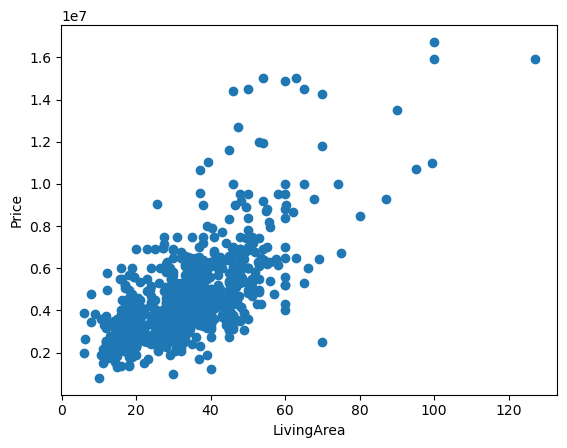

count    1374.000000
mean        9.382606
std         3.614831
min         3.000000
25%         7.000000
50%         9.000000
75%        10.675000
max        45.000000
Name: KitchenArea, dtype: float64


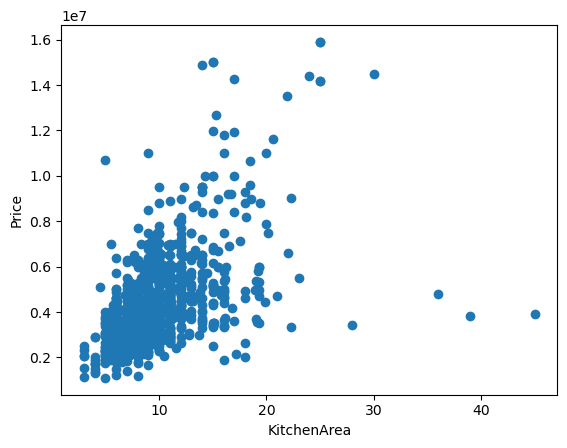

count    472.000000
mean       3.178919
std        3.418143
min        1.000000
25%        2.600000
50%        2.700000
75%        2.800000
max       30.000000
Name: CeilingHeight, dtype: float64


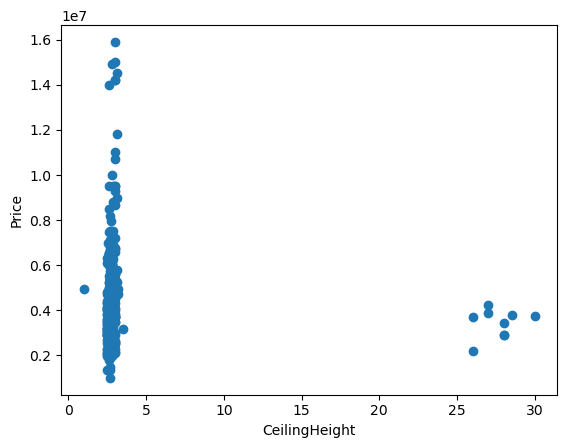

count     861.000000
mean     1994.103368
std        20.409181
min      1917.000000
25%      1976.000000
50%      1999.000000
75%      2013.000000
max      2023.000000
Name: FondationYear, dtype: float64


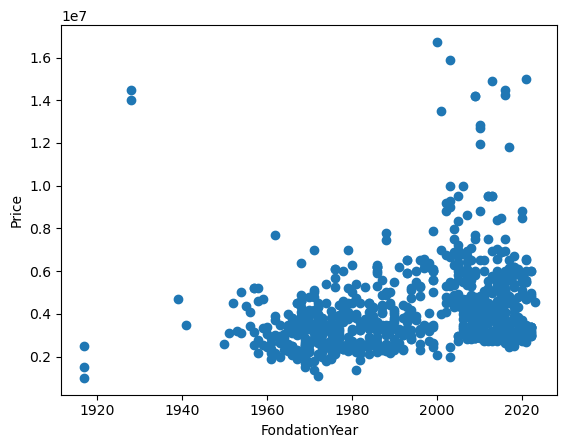

In [14]:
for variable in continuous_variables:
    print(df[variable].describe())
    fig, ax = plt.subplots()
    ax.scatter(x=df[variable], y=Y)
    plt.ylabel('Price')
    plt.xlabel(variable)
    plt.show()

На графиках зависимости признаков 'AllArea' и 'LivingArea' от цены виден линейный тренд, зависимость 'KitchenArea' также склоняется к тренду, но имеет тенденцию к повышению разброса значений целевого признака с ростом значения нецелевого. Признак 'CeilingHeight' имеет множество пустых значений, и на графике прослеживается ряд очевидных аномальных значений. Признак 'FondationYear' также имеет большое количество пустых значений, есть небольшая тенденция к уменьшению цены со временем, но на выборке она слабо заметна

count                       1481
unique                        47
top       Агентство недвижимости
freq                        1128
Name: ContactType, dtype: object


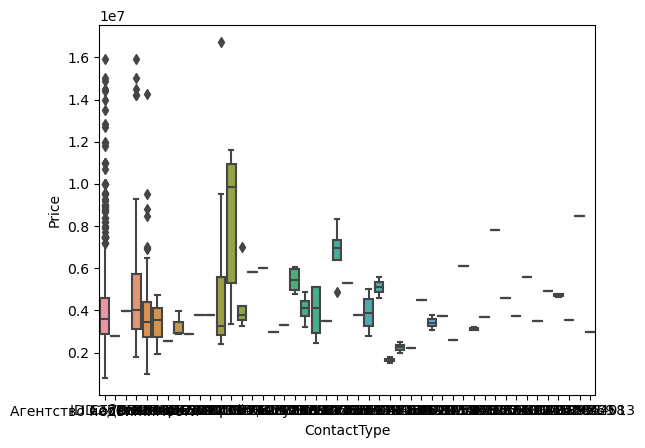

count                     1402
unique                     217
top       Эпсилон-недвижимость
freq                       378
Name: ContactName, dtype: object


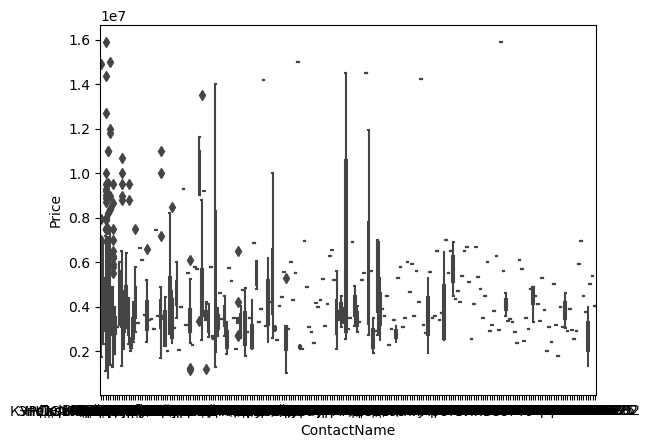

count         1481
unique           4
top       Вторичка
freq          1451
Name: HousingType, dtype: object


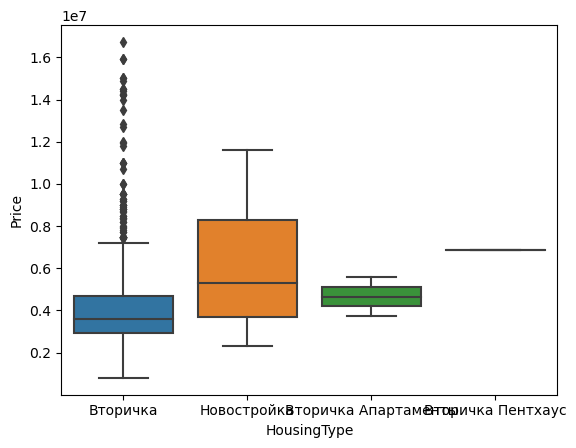

count              1311
unique                4
top       Косметический
freq                910
Name: RenovationType, dtype: object


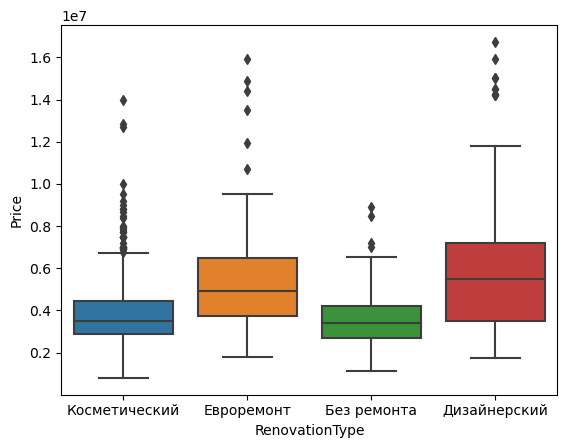

In [15]:
for variable in nominal_variables:
    print(df[variable].describe())
    sns.boxplot(x=variable, y='Price', data=df)
    plt.show()

Графики описывающие зависимость 'ContactType' и 'ContactName' малоинформативны, так как признаки имеют слишком много уникальных значений, однако можно заметить, что среди значений есть группа наиболее часто встречаемых категорий. Признак 'HousingType' характеризуется явным количественным преобладанием значений первой категории над остальными. В зависимости 'RenovationType' также прослеживается значительный перевес одной из категорий, но несмотря на это тренд прослеживается. Зависимость 'WindowView' выражает явный тренд, однако в каждой категории наблюдаются аномальные значения. Признак 'Balcony/Loggia' кроме прочих, имеет две категории с незначительным количеством значений и преобладающую категорию, объекты которой как правило принимают низкие значения целевого признака.

count    1481.000000
mean        5.611074
std         4.011468
min         1.000000
25%         2.000000
50%         5.000000
75%         8.000000
max        18.000000
Name: Floor, dtype: float64


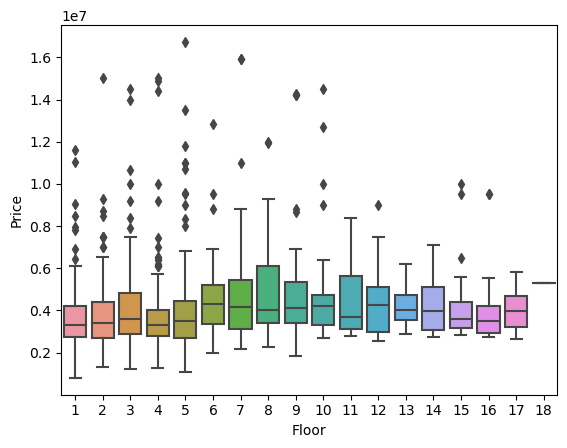

In [16]:
for variable in ordinal_variables:
    print(df[variable].describe())
    sns.boxplot(x=variable, y='Price', data=df)
    plt.show()

На графике зависимости 'Floor' прослеживается явная зависимость, близкая к нормальному распределению с увеличенным масштабом, заметно высокое количество аномальных значений в левой части графика, а также очень низкое число объектов принадлежащих последней категории.

##  Анализ зависимостей между отдельными признаками

Для того чтобы построить график зависимости признаков друг от друга, в первую очередь необходимо преобразовать отображение признаков.

Среди признаков которые необходимо обработать:
 - все номинальные признаки;
 - смешанные признаки 'Restroom' и 'Balcony/Loggia';
 - признак 'FondationYear'.

Начнём с номинальных признаков. Преобразуем их с помощью метода кодирования категориальных признаков OneHotEncoder.

Сначала рассмотрим каждый признак чтобы выбрать оптимальную стратегию преобразования

In [17]:
from sklearn.preprocessing import OneHotEncoder
for variable in nominal_variables:
    top_categories = df[variable].value_counts().head(10)
    print(top_categories, '\n')

Агентство недвижимости    1128
Риелтор                    140
Собственник                124
ID 50013271                 12
Застройщик                   6
ID 13863856                  5
ID 11068544                  4
ID 52176844                  4
Консультант                  4
ID 73629422                  4
Name: ContactType, dtype: int64 

Эпсилон-недвижимость    378
НДС недвижимость        172
Мой город               103
ProДом46                 93
КУРСКАЯ НЕДВИЖИМОСТЬ     91
Перспектива 24 Курск     75
ИП Бобынцева Л.Н.        33
Перекресток              25
Жилищный Фонд            18
ID 20850301              17
Name: ContactName, dtype: int64 

Вторичка                1451
Новостройка               27
Вторичка Апартаменты       2
Вторичка Пентхаус          1
Name: HousingType, dtype: int64 

Косметический    910
Без ремонта      195
Евроремонт       157
Дизайнерский      49
Name: RenovationType, dtype: int64 



В признаке 'ContactType' есть 3 категории которые покрывают большую часть выборки.

В признаке 'ContactName' сильнее выражен разброс объектов по категориям. На первых местах, что вполне ожидаемо, стоят агентства недвижимости, выделим самые крупные.

Среди категорий признака 'HousingType' присутствуют две категории с незначительным колчичеством объектов, при этом обе принадлежат родительской категории 'Вторичка'.

Для признаков 'RenovationType' и 'WindowView' дополнительные правила преобразования не требуются

Кодируем признаки используя OneHotEncoder и ранее полученную информацию о распределении категорий и их оптимальном количестве для каждого номинального признака.
Для смешанных признаков 'Balcony/Loggia', 'Restroom' создаем новые признаки с помощью OneHotEncoder, но изменяем их таким образом, чтобы они обозначали не наличие, а количество. Признак 'FondationYear' указывающий на год основания здания заменяем на признак 'HouseAge' обозначающий возраст здания

In [18]:
class CategoricalFeatureEncoder:        
    def fit_transform(self, X, max_nominal_categories=[3, 8, 2, 4, 3]):
        self.X = X
        self.encode_nominal_feats(max_nominal_categories)
        self.encode_mixed_vars()
        self.encode_year_feat()
        
        return self.X

    def encode_nominal_feats(self, max_categories):
        variable_categories_count = dict(zip(nominal_variables, max_categories))

        for variable, count in variable_categories_count.items():
            top_categories = self.X[variable].value_counts().head(count)
            categories_list = top_categories.index.to_list()
            ohe = OneHotEncoder(handle_unknown='ignore', 
                                categories=[categories_list])
            encoded = ohe.fit_transform(self.X[variable].values.reshape(-1, 1))
            self.X[categories_list] = encoded.toarray()
            self.X = self.X.drop(columns=variable)
        
    def encode_mixed_vars(self):
        mixed_feats = ['Balcony/Loggia', 'Restroom', 'WindowView']
        ohe = OneHotEncoder()
        balc = ohe.fit_transform(self.X[mixed_feats[0]].values.reshape(-1, 1)).toarray()
        rest = ohe.fit_transform(self.X[mixed_feats[1]].values.reshape(-1, 1)).toarray()
        view = ohe.fit_transform(self.X[mixed_feats[2]].values.reshape(-1, 1)).toarray()

        for obj in rest:
            if obj[4]:
                obj[0] = 2
            elif obj[3]:
                obj[0] = 2
                obj[1] = 1
            elif obj[2]:
                obj[0] = 1
                obj[1] = 1
        
        rest_columns_to_drop = range(2, len(rest[0]))
        rest = np.delete(rest, rest_columns_to_drop, axis=1)
        self.X[['Раздельный', 'Совмещенный']] = rest

        for obj in balc:
            if obj[5]:
                obj[2] = 2
            elif obj[4]:
                obj[0] = 2
                obj[2] = 1
            elif obj[3]:
                obj[0] = 2
            elif obj[1]:
                obj[0] = 1
                obj[2] = 1
                
        balc[:, [2, 1]] = balc[:, [1, 2]]
        balc_columns_to_drop = range(2, len(balc[0]))
        balc = np.delete(balc, balc_columns_to_drop, axis=1)
        self.X[['Балкон', 'Лоджия']] = balc
        
        for obj in view:
            if obj[2]:
                obj[0] = 1
                obj[1] = 1
                
        view_columns_to_drop = range(2, len(view[0]))
        view = np.delete(view, view_columns_to_drop, axis=1)
        self.X[['Во двор', 'На улицу']] = view
        
        self.X = self.X.drop(columns=mixed_feats)
    
    def encode_year_feat(self):
        def f (row):
            if np.isnan(row['FondationYear']) == False:
                value = 2023 - row['FondationYear']
            else:
                value = row['FondationYear']
            return value

        self.X['HouseAge'] = self.X.apply(f, axis=1)
        self.X = self.X.drop(columns='FondationYear')

In [19]:
encoder = CategoricalFeatureEncoder()
df = encoder.fit_transform(df)

Приведение категориальных признаков к необходимому виду позволяет нам построить график зависимостей признаков друг от друга

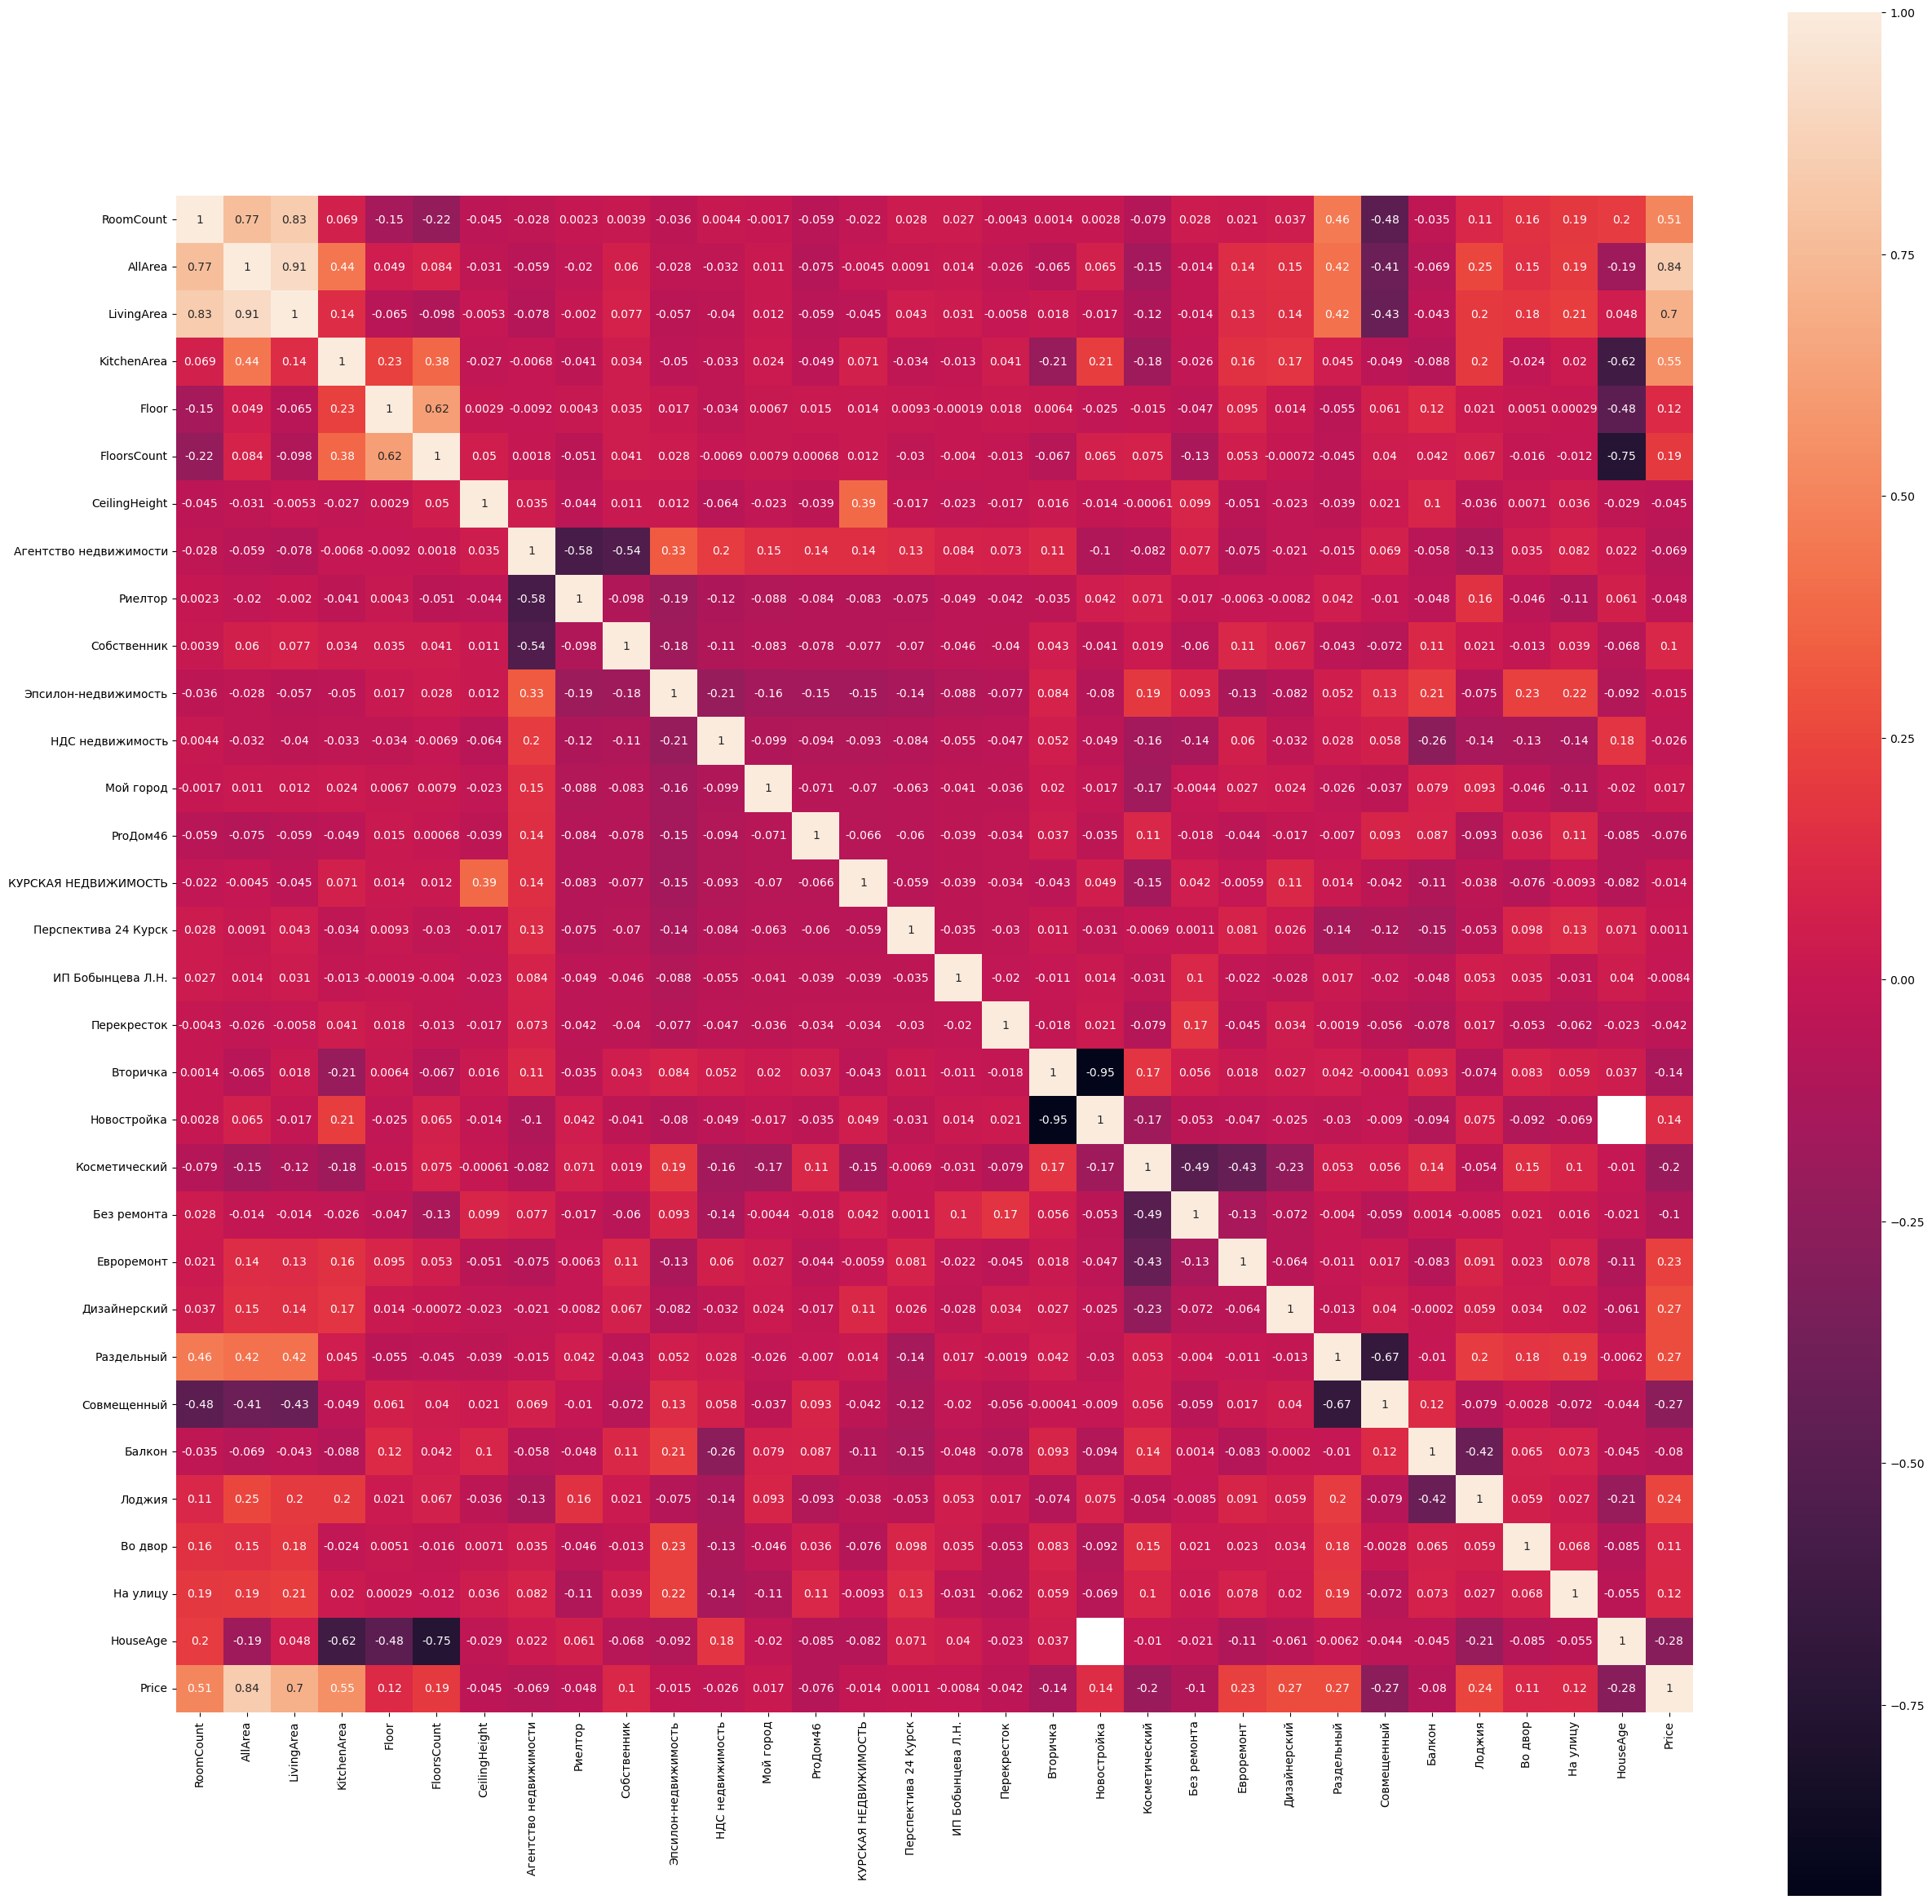

In [20]:
# Переместить столбец целевого признака в конец таблицы.
df['Price'] = df.pop('Price')
corrmat = df.corr()
plt.subplots(figsize=(30, 30))
sns.heatmap(corrmat, square=True, annot=True)
plt.show()

Среди сильных зависимостей прослеживаются явные зависимости 'RoomCount', 'AllArea', 'LivingArea' и 'KitchenArea' на целевой признак, что является естественным. 

График также показал значительную зависимость признаков обозначающих вид из окна от признаков площади и количества комнат, что вполне логично. 

Признак 'HouseAge' показывает необычные зависимости на признаки площади, а также на количество этажей, это можно интерпретировать так - раньше строили дома с меньшим количеством этажей и меньшей площадью квартир. Такая интерпретация выглядит логично, однако стоит учитывать большую степень отсутствия значений признака 'HouseAge'.

С другой стороны зависимость между признаками 'CeilingHeight' и 'КУРСКАЯ НЕДВИЖИМОСТЬ' скорее всего является результатом маленького количества данных в этих признаках.

В результате преобразования номинальных признаков, 'Агентство недвижимости' и признаки наименований самых популярных агентств недвижимости накладываются. Чтобы избежать наложения и присвоить признаку 'Агентство недвижимости' смысл 'Другие агентства' необходимо выполнить дополнительные преобразования

In [21]:
def fix_agency_feat(X):
    companies = ['Эпсилон-недвижимость', 'НДС недвижимость', 
                 'Мой город', 'ProДом46', 
                 'КУРСКАЯ НЕДВИЖИМОСТЬ', 'Перспектива 24 Курск', 
                 'ИП Бобынцева Л.Н.', 'Перекресток']
    for company in companies:
        X.loc[X[company] == 1, 'Агентство недвижимости'] = 0

    X['Другие агентства'] = X.pop('Агентство недвижимости')

# Чистка данных

## Обработка аномальных данных

Для корректной обработки и заполнения нулей с помощью алгоритмов кластеризации и k-средних необходимо сначала выполнить обработку аномальных данных и выбросов.

На этапе первоначального анализа признаков уже были выявлены некоторые аномалии. На данном этапе основываясь на графиках и ранее предложенных гипотезах разработаем методы обработки обнаруженных аномалий

In [22]:
# Присвоить объектам аномальных категорий значения родительской категории.
anomal_cats = ['Вторичка Апартаменты', 'Вторичка Пентхаус']
X.loc[X['HousingType'] == anomal_cats[0], 'HousingType'] = 'Вторичка'
X.loc[X['HousingType'] == anomal_cats[1], 'HousingType'] = 'Вторичка'

Изложенный ниже метод обрабатывает ошибки ввода значений признаков 'KitchenArea' и 'LivingArea'

In [23]:
def swap (row):
    if row['KitchenArea'] > row['LivingArea']:
        return [row['KitchenArea'], row['LivingArea']]
    else:
        return [row['LivingArea'], row['KitchenArea']]

X[['LivingArea', 'KitchenArea']] = X.apply(swap, axis=1).to_list()

## Заполнение нулевых значений

Перед началом обработки нулевых значений необходимо выбрать стратегию и метод заполнения. Построим таблицу процентного соотношения нулевых значений для каждого признака

In [24]:
def get_missing_ratio(X):
    X_na = (X.isnull().sum() / len(X)) * 100
    X_na_sorted = X_na.sort_values(ascending=False)
    
    return pd.DataFrame({'Missing Ratio (%)': X_na_sorted})

get_missing_ratio(X)

,Missing Ratio (%)
CeilingHeight,68.129642
FondationYear,41.863606
Balcony/Loggia,31.937880
WindowView,28.696826
Restroom,16.812964
LivingArea,15.259959
RenovationType,11.478731
KitchenArea,7.224848
ContactName,5.334234
RoomCount,0.000000


Признак 'CeilingHeight' имеет 68% пустых значений, его заполнение скорее всего приведет к ухушению точности итоговых результатов, поэтому в выборке он учитываться не будет.

In [25]:
X = X.drop(columns='CeilingHeight')

В результате проведенного анализа данных, была выяснена высокая степень зависимости между признаки обозначающими площадь. Предположительно существует множество групп схожих квартир которые имеют одинаковую планировку и следовательно одинаковые значения признаков описывающих площадь.

Руководствуясь этой гипотезой выделим частные зависимые и зависящие признаки для кластеризации по типу планировки

In [26]:
num_feats_to_cluster = {
    'LivingArea' : ['RoomCount', 'AllArea', 'FloorsCount'],
    'KitchenArea' : ['RoomCount', 'AllArea', 'FloorsCount'],
}
cat_feats_to_cluster = {
    'Restroom' : ['RoomCount', 'AllArea', 'FloorsCount'],
    'WindowView' : ['RoomCount', 'AllArea' , 'FloorsCount'],
}

In [27]:
class ClusterImputer:        
    def fit_transform(self, X, independent, dependent, strategy):
        self.X = X
        equal_groups = self.group_by_equal_features(independent)
        sorted_groups = self.sort_by_null_count(equal_groups)
        if strategy is 'median':
            self.imput_median_by_groups(sorted_groups, dependent)
        elif strategy is 'mode':
            self.imput_most_frequent_by_groups(sorted_groups, dependent)
            
        return self.X

    def group_by_equal_features(self, independent):
        main = self.X[independent]
        twins = main.drop(main.drop_duplicates(keep=False).index)
        twins_indexes = list(twins.index)
        equal_groups = {}
        for index in twins_indexes:
            cur_series = twins.loc[index]
            values = cur_series.values
            if equal_groups.get(f'{values}'):
                equal_groups[f'{values}'].append(index)
            else:
                equal_groups[f'{values}'] = [index]

        return equal_groups

    def sort_by_null_count(self, groups):
        sorted_groups = {}

        for item in groups.items():
            indexes = {}

            for index in item[1]:
                indexes[index] = sum(self.X.loc[index].isnull().values)

            sorted_i = dict(sorted(indexes.items(), key=lambda item: item[1]))
            sorted_groups[f'{item[0]}'] = list(sorted_i.keys())

        return sorted_groups

    def imput_median_by_groups(self, sorted_groups, dependent):
        overall_median = int(self.X[dependent].median())

        for group in sorted_groups:
            current_group = sorted_groups[group]
            median = self.X.loc[current_group, dependent].median()

            for index in sorted_groups[group]:
                if pd.isna(self.X.loc[index, dependent]):
                    self.X.loc[index, dependent] = median
                    
    def imput_most_frequent_by_groups(self, sorted_groups, dependent):
        overall_mode = self.X[dependent].mode()

        for group in sorted_groups:
            current_group = sorted_groups[group]
            mode_series = self.X.loc[current_group, dependent].mode()

            if mode_series.empty:
                mode = overall_mode.iloc[0]
            else:
                mode = mode_series.iloc[0]

            for index in sorted_groups[group]:
                if pd.isna(self.X.loc[index, dependent]):
                    self.X.loc[index, dependent] = mode

In [28]:
ci = ClusterImputer()

for feat in num_feats_to_cluster.items():
    X = ci.fit_transform(X, feat[1], feat[0], 'median')
    
for feat in cat_feats_to_cluster.items():
    X = ci.fit_transform(X, feat[1], feat[0], 'mode')

get_missing_ratio(X)

,Missing Ratio (%)
FondationYear,41.863606
Balcony/Loggia,31.937880
RenovationType,11.478731
WindowView,11.208643
Restroom,7.157326
LivingArea,6.684673
ContactName,5.334234
KitchenArea,3.173531
RoomCount,0.000000
AllArea,0.000000


Объекты с нулевым значением 'ContactName' хранят значение это признака в значении 'ContactType' из-за неверного ввода данных. Чтобы исправить это, нужно проверить какое значение признака 'ContactType' имеет объект. Если значение 'ContactName' попадается в выборке больше одного раза, то 'ContactType' - риелтор, в другом случае - собственник

In [29]:
def impute_contact_feats(X):
    cond_name_null = X['ContactName'].isnull()
    null_name_types = X.loc[cond_name_null, 'ContactType']
    unique_types = null_name_types.drop_duplicates(keep=False)
    repeat_types = null_name_types.drop(unique_types.index)
    X.loc[unique_types.index, 'ContactName'] = unique_types.values
    X.loc[unique_types.index, 'ContactType'] = 'Собственник'
    X.loc[repeat_types.index, 'ContactName'] = repeat_types.values
    X.loc[repeat_types.index, 'ContactType'] = 'Риелтор'
    
impute_contact_feats(X)

Следующий шаг - общее заполнение пустых значений с помощью метода k-средних и простого выбора самого частого значения

In [30]:
from sklearn.impute import KNNImputer, SimpleImputer

cat_feat_null = ['Restroom', 'WindowView', 
                 'Balcony/Loggia', 'RenovationType']
simple_imputer = SimpleImputer(strategy='most_frequent')
knn_imputer = KNNImputer(n_neighbors=5)
X[cat_feat_null] = simple_imputer.fit_transform(X[cat_feat_null])
# KNNImputer не принимает на вход категориальные признаки,
# поэтому необходимо заранее преобразовать их.
X = encoder.fit_transform(X)
fix_agency_feat(X)
x_columns = X.columns
X[x_columns] = knn_imputer.fit_transform(X)

get_missing_ratio(X)

,Missing Ratio (%)
RoomCount,0.0
AllArea,0.0
HouseAge,0.0
На улицу,0.0
Во двор,0.0
Лоджия,0.0
Балкон,0.0
Совмещенный,0.0
Раздельный,0.0
Дизайнерский,0.0


# Подготовка данных для модели

Масштабируем непрерывные числовые признаки с помощью трансформера RobustScaler. Логарифмируем целевой признак, т.к. на графике ранее было обнаружено распределение близкое к логнормальному.

In [31]:
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

feats_to_scale = ['AllArea', 'LivingArea', 'KitchenArea', 'HouseAge']
X[feats_to_scale] = scaler.fit_transform(X[feats_to_scale].values)
X = X.values
Y = np.log1p(Y)

Разделяем общую выборку на тренировочную и тестовую

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, train_size=0.8, random_state=42)

# Обучение модели и оптимизация гиперпараметров

Теперь когда данные готовы, можно приступить к обучению моделей. В данном решении результирующие предсказания оптимизированных моделей будут использоваться в сложном обобщении с помощью модели Ridge с целью увеличения общей точности и уменьшения величины ошибок частных моделей

In [33]:
# Модели.
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from mlxtend.regressor import StackingCVRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from mlxtend.regressor import StackingCVRegressor
# Метрики.
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer
# Инструменты.
import optuna
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import GridSearchCV

Будут рассмотрены следующие нижеперечисленные модели. Среди метрик для более общего восприятия при кросс-валидации будут использоваться несколько нижеперечисленных метрик, однако существует необходимость выбора основной метрики, которая в наиболее полной степени описывала бы точность модели. Выбор остановился на коэффициенте детерминации, так как его точность во многом зависит от степени нормального распределения целевого признака выборки, а в нашем случае целевой признак имеет логнормальное распределение с небольшим смещением и невысоким ненулевым масштабом.

In [34]:
metrics = {
    'r2': r2_score, 
    'MSE': mean_squared_error, 
    'MAE': mean_absolute_error
}
models = {
    'LinearRegression': LinearRegression(),
    'SVR': SVR(),
    'RandomForest': RandomForestRegressor(),
    'BaggingRegressor': BaggingRegressor(),
    'Ridge': Ridge(),
    'LGBM': LGBMRegressor(),
    'XGB': XGBRegressor()
}

При кросс-валидации перемешанная тренировочная выборка будет разбита на 7 частей. В процессе каждая модель будет оценена, а в результате мы увидим среднюю оценку и отклонение для показателя точности расчитанного каждой метрикой

In [35]:
kf = KFold(n_splits=7, random_state=42, shuffle=True)

def get_scores(models, metrics, X, Y):
    metric_names = metrics.keys()
    score_df = pd.DataFrame(columns=metric_names)
    
    for model in models.items():
        scores = {}
        for i, metric in enumerate(metrics.items()):
            scorer = make_scorer(metric[1])
            score = cross_val_score(model[1], X, Y, scoring=scorer, cv=kf)
            scores[metric[0]] = '{:.4f} ({:.4f})'.format(score.mean(), score.std())
        model_scores = pd.DataFrame([scores], index=[model[0]])
        score_df = pd.concat([score_df, model_scores])
        
    return score_df

In [36]:
get_scores(models, metrics, X_train, y_train)

,r2,MSE,MAE
LinearRegression,0.7802 (0.0398),0.0330 (0.0047),0.1320 (0.0085)
SVR,0.7918 (0.0492),0.0311 (0.0062),0.1283 (0.0103)
RandomForest,0.8006 (0.0427),0.0294 (0.0046),0.1247 (0.0089)
BaggingRegressor,0.7833 (0.0506),0.0319 (0.0045),0.1299 (0.0125)
Ridge,0.7807 (0.0396),0.0329 (0.0047),0.1319 (0.0081)
LGBM,0.7967 (0.0414),0.0305 (0.0053),0.1266 (0.0088)
XGB,0.7812 (0.0443),0.0328 (0.0056),0.1314 (0.0082)


Выделим для каждой модели ряд гиперпараметров и значения для них, которые будет в дальнейшем оптимизироваться. Нужно отметить, что модели основанные на принципе градиентного бустинга будут оптимизироваться отдельно

In [37]:
models_and_hparams = {
    Ridge() : {
        'alpha': [0.001, 0.005, 0.01, 0.015, 0.05, 0.1, 0.15, 0.5, 0.75, 1]
    },
    SVR() : {
        'epsilon': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1], 
        'C': [1, 10, 25, 50, 75, 100]
    },
    RandomForestRegressor() : {
        'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)],
        'min_samples_split' : [2, 5, 10],
        'min_samples_leaf' : [1, 2, 5, 10]
    },
    BaggingRegressor() : {
        'n_estimators' : [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)],
        'max_samples': [0.6, 0.7, 0.8, 1],
        'max_features': [15, 20, 25, 30],
    },
}

Нахождение гиперпараметров реализовано с помощью метода GridSearchCV

In [38]:
def get_best_hparams(models_and_hparams):
    best_params = []
    
    for model, hparams in models_and_hparams.items():
        gs = GridSearchCV(model, hparams)
        gs.fit(X_train, y_train)
        best_params.append(gs.best_params_)
        print(model)
        print('Best hyperparams: {}\nBest score: {}'.format(gs.best_params_, gs.best_score_))
        
    return best_params

Для тренировки моделей основанных на принципе градиентного бустинга будет использоваться фреймворк Optuna. Также как и в прошлом случае, мы выбираем ряд гиперпараметров и их значения, которые будут передаваться для дальнейшего обучения. 

In [39]:
def lgb_objective(trial):
    param = {
        'metric': 'r2',
        'n_estimators': 20000,
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.006,0.008,0.01,0.014,0.017,0.02]),
        'max_depth': trial.suggest_categorical('max_depth', [10,20,100,200]),
        'num_leaves' : trial.suggest_int('num_leaves', 10, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 500),
        'cat_smooth' : trial.suggest_int('min_data_per_groups', 1, 200)
    }
    model = LGBMRegressor(**param)
    model.fit(X_train, y_train, eval_set=[(X_test,y_test)], verbose=False)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)

    return r2

In [40]:
def xgb_objective(trial):
    param = {
        'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
        'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
        'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
        'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
        'n_estimators': 10000,
        'max_depth': trial.suggest_categorical('max_depth', [5,7,9,11,13,15,17]),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 300)
    }
    model = XGBRegressor(**param)
    model.fit(X_train, y_train, eval_set=[(X_test,y_test)], verbose=False)
    preds = model.predict(X_test)
    r2 = r2_score(y_test, preds)

    return r2

In [41]:
def optimize_gb(objective, n_trials):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)
    print('Number of finished trials:', len(study.trials))
    print('Best trial:', study.best_trial.params)

В результате вышеперечисленных вычислений имеем следующие гиперпараметры для моделей

In [42]:
ready_models = [
    Ridge(alpha=1),
    SVR(
        C=10, 
        epsilon=0.05
    ),
    RandomForestRegressor(
        n_estimators=600,
        max_depth=10,
        min_samples_split=12, 
        min_samples_leaf=6
    ),
    BaggingRegressor(
        n_estimators=600, 
        max_samples=0.8, 
        max_features=25
    ),
    LGBMRegressor(
        metric='r2', 
        random_state=42,
        n_estimators=20000,
        reg_alpha=0.002102035431233085,
        reg_lambda=0.0063499510228077925,
        colsample_bytree=0.5,
        subsample=0.6,
        learning_rate=0.02,
        max_depth=100,
        num_leaves=2,
        min_child_samples=10,
        cat_smooth=10
    ),
    XGBRegressor(
        n_estimators=10000,
        reg_lambda=0.0011409156100755458,
        alpha=0.9861684623854489,
        colsample_bytree=0.3,
        subsample=0.8,
        learning_rate=0.01,
        max_depth=11,
        min_child_weight=6
    )
]

Как можно заметить, точность по всем ранее используемым метрикам повысилась

In [43]:
names = ['Ridge', 'SVR', 'RandomForest', 'BaggingRegressor', 'LGBM', 'XGB']
dop = dict(zip(names, ready_models))
get_scores(dop, metrics, X_train, y_train)

,r2,MSE,MAE
Ridge,0.7807 (0.0396),0.0329 (0.0047),0.1319 (0.0081)
SVR,0.8007 (0.0496),0.0297 (0.0059),0.1247 (0.0099)
RandomForest,0.7869 (0.0433),0.0319 (0.0056),0.1284 (0.0070)
BaggingRegressor,0.8055 (0.0421),0.0291 (0.0055),0.1230 (0.0090)
LGBM,0.8088 (0.0463),0.0285 (0.0052),0.1238 (0.0080)
XGB,0.8025 (0.0445),0.0295 (0.0056),0.1249 (0.0097)


Для проверки моделей на переобучение сравним разность точности предсказаний тренировочной и тестовой выборки.

Замечаем, что некоторые модели имеют некоторую степень переобучения, однако несмотря на это, точность на тестовой выборке остаётся высокой

In [44]:
def compare_predictions(model, metric, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)
    train_score = metric(y_train, train_pred)
    test_score = metric(y_test, test_pred)
    score_difference = abs(train_score-test_score)
    return '{:.4f} - {:.4f} = {:.4f}'.format(train_score, test_score, score_difference)

In [45]:
for model in ready_models:
    print(compare_predictions(model, mean_absolute_error, X_train, y_train, X_test, y_test))

0.1287 - 0.1363 = 0.0075
0.1042 - 0.1290 = 0.0248
0.0953 - 0.1356 = 0.0403
0.0543 - 0.1306 = 0.0763
0.1058 - 0.1344 = 0.0285
0.0608 - 0.1272 = 0.0664


Для более точного наблюдения приведем предсказанные и истинные значения в изначальный вид

In [46]:
def get_invert_pred(model):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_train)
    y_invert = {
        'true': np.expm1(y_train),
        'predicted': np.round(np.expm1(y_pred))
    }
    mae = mean_absolute_error(np.expm1(y_train), np.expm1(y_pred))
    print(mae)
    
    return pd.DataFrame(data=y_invert)

Рассмотрим модель BaggingRegressor т.к. она имеет наиболее высокую степень переобучения по сравнению с другими моделями. По величине средней абсолютной ошибки и по разнице истинных и предсказанных значений можно сделать вывод о том несмотря на некоторое влияние переобучения, модель сохраняет необходимую точность 

In [47]:
get_invert_pred(ready_models[3])

234595.30430542407


,true,predicted
381,3500000.0,3517937.0
532,1870000.0,2106196.0
755,3800000.0,3534616.0
482,3100000.0,3299242.0
405,5400000.0,4728917.0
...,...,...
1130,3360000.0,3415973.0
1294,6200000.0,5742659.0
860,3600000.0,3384544.0
1459,2870000.0,2883489.0


Для реализации сложного обобщения используем класс StackingCVRegressor, в котором роль финального регрессора будет отведена гребневому регрессору

In [48]:
stack = StackingCVRegressor(regressors=ready_models, meta_regressor=Ridge(3))
get_scores({'StackingRegressor': stack}, metrics, X_train, y_train)

,r2,MSE,MAE
StackingRegressor,0.8196 (0.0435),0.0270 (0.0055),0.1180 (0.0098)


In [49]:
compare_predictions(stack, r2_score, X_train, y_train, X_test, y_test)

'0.9211 - 0.8094 = 0.1118'

In [50]:
stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
y_pred_inv = np.expm1(y_pred)
y_true_inv = np.expm1(y_test)

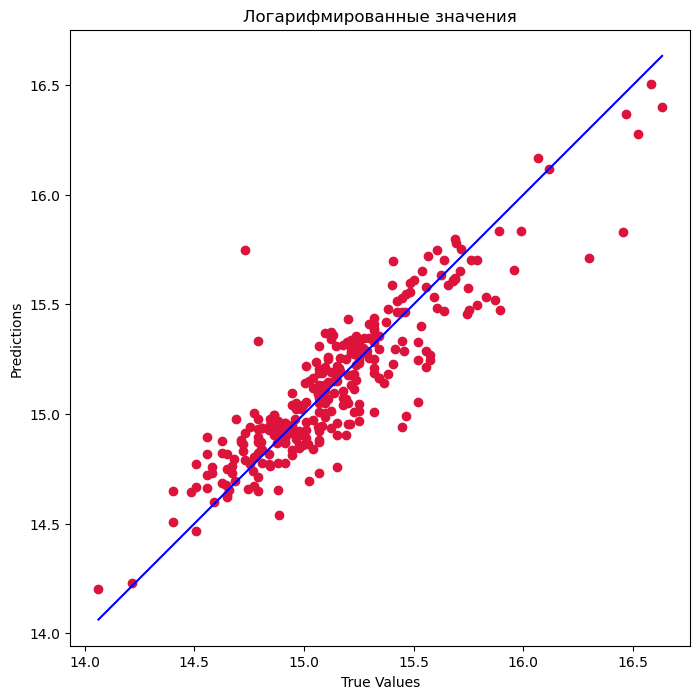

In [51]:
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, c='crimson')
p1 = max(max(y_pred), max(y_test))
p2 = min(min(y_pred), min(y_test))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Логарифмированные значения')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

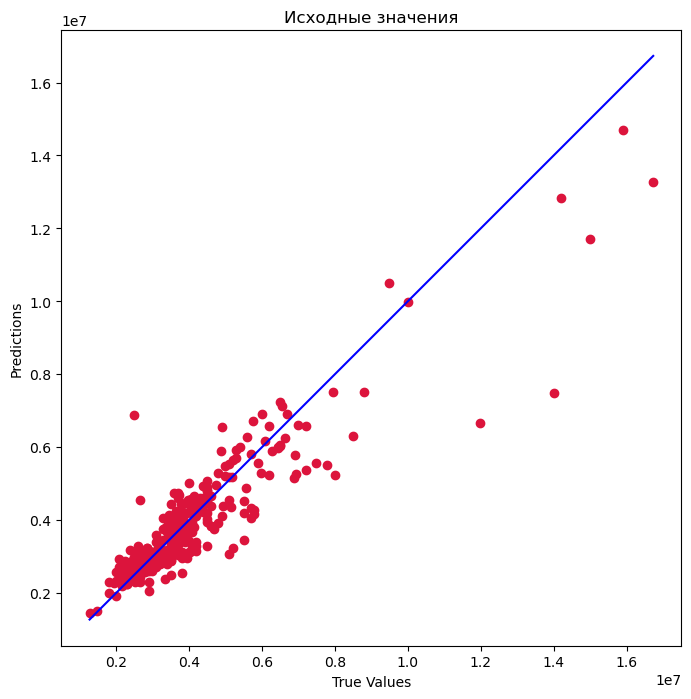

In [52]:
plt.figure(figsize=(8,8))
plt.scatter(np.expm1(y_test), y_pred_inv, c='crimson')
p1 = max(max(y_pred_inv), max(y_true_inv))
p2 = min(min(y_pred_inv), min(y_true_inv))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('Исходные значения')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.axis('equal')
plt.show()

Метрики точности и график показали хорошие результаты, финальная модель имеет небольшое переобучение - это можно заметить по разности точностей предсказания на разных частях выборки, но в целом можно сделать вывод о том, что модель имеет хорошие результаты предсказания 